In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r"C:\Users\benan\Downloads\sms_spam_large.csv")
df.head()


,label,message
0,ham,I will reach home by evening
1,spam,Limited offer claim your prize now
2,ham,I will reach home by evening
3,spam,Win big cash by clicking this link
4,ham,Reminder about tomorrow's exam


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    400 non-null    object
 1   message  400 non-null    object
dtypes: object(2)
memory usage: 6.4+ KB


In [4]:
df['label'].value_counts()


label
ham     200
spam    200
Name: count, dtype: int64

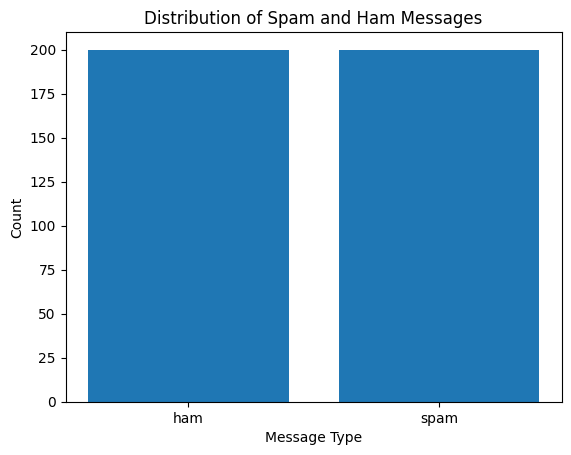

In [5]:
label_counts = df['label'].value_counts()

plt.figure()
plt.bar(label_counts.index, label_counts.values)
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.title("Distribution of Spam and Ham Messages")
plt.show()


In [6]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()


,label,message
0,0,I will reach home by evening
1,1,Limited offer claim your prize now
2,0,I will reach home by evening
3,1,Win big cash by clicking this link
4,0,Reminder about tomorrow's exam


In [7]:
X = df['message']
y = df['label']


In [8]:
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y, test_size=0.2, random_state=42
)


In [10]:
model = MultinomialNB()
model.fit(X_train, y_train)


,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [11]:
y_pred = model.predict(X_test)


In [12]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


1.0

In [13]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[44,  0],
       [ 0, 36]])

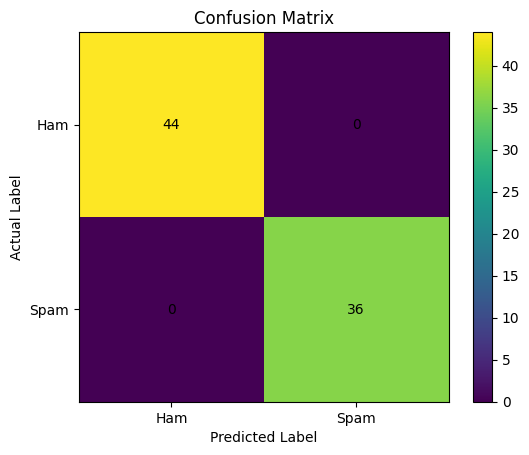

In [14]:
plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()

plt.xticks([0, 1], ["Ham", "Spam"])
plt.yticks([0, 1], ["Ham", "Spam"])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


In [15]:
df['message_length'] = df['message'].apply(len)
df.head()


,label,message,message_length
0,0,I will reach home by evening,28
1,1,Limited offer claim your prize now,34
2,0,I will reach home by evening,28
3,1,Win big cash by clicking this link,34
4,0,Reminder about tomorrow's exam,30


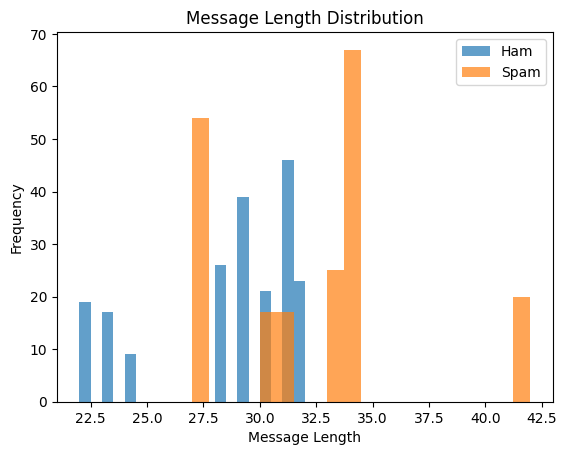

In [16]:
plt.figure()
plt.hist(df[df['label'] == 0]['message_length'], bins=20, alpha=0.7, label="Ham")
plt.hist(df[df['label'] == 1]['message_length'], bins=20, alpha=0.7, label="Spam")

plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.title("Message Length Distribution")
plt.legend()
plt.show()


In [17]:
def predict_message(msg):
    msg_vector = vectorizer.transform([msg])
    prediction = model.predict(msg_vector)
    return "SPAM" if prediction[0] == 1 else "HAM"


In [18]:
predict_message("Congratulations you have won free cash")


'SPAM'

In [19]:
predict_message("Please send the class notes")


'HAM'

In [20]:
print("Spam classification with Naive Bayes completed successfully.")
print("Model Accuracy:", accuracy)


Spam classification with Naive Bayes completed successfully.
Model Accuracy: 1.0
